## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib.pyplot as plt
!pip install colorama
from colorama import Fore


from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

## Bitcoin

**Bitcoin is a digital currency which operates free of any central control or the oversight of banks or governments. Instead it relies on peer-to-peer software and cryptography. A public ledger records all bitcoin transactions and copies are held on servers around the world.**

In [2]:
bitcoindf = pd.read_csv('/content/BTC-USD.csv')
bitcoindf = bitcoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
bitcoindf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.0
1,2015-09-14,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.0
2,2015-09-15,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.0
3,2015-09-16,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.0
4,2015-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.0


## Dogecoin

**Dogecoin is primarily used for tipping users on Reddit and Twitter, but it is also accepted as a method of payment by a few dozen merchants. It can be used to buy food, household supplies and even website domains.**

In [3]:
dogecoindf = pd.read_csv('/content/DOGE-USD.csv')
dogecoindf = dogecoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
dogecoindf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,0.000127,0.000129,0.000123,0.000126,0.000126,40889.0
1,2015-09-14,0.000125,0.000126,0.000122,0.000125,0.000125,61189.0
2,2015-09-15,0.000125,0.000131,0.000123,0.000126,0.000126,43332.0
3,2015-09-16,0.000126,0.000126,0.000122,0.000124,0.000124,60323.0
4,2015-09-17,0.000124,0.000126,0.000122,0.000125,0.000125,60512.0


## Ethereum

**Ethereum operates on a decentralized computer network, or distributed ledger called a blockchain, which manages and tracks the currency. It can be useful to think of a blockchain like a running receipt of every transaction that's ever taken place in the cryptocurrency.**

In [4]:
ethereumdf = pd.read_csv('/content/ETH-USD.csv')
ethereumdf = ethereumdf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
ethereumdf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,1.041780,1.042700,0.902832,0.936003,0.936003,644138.0
1,2015-09-14,0.940566,0.949387,0.871760,0.875622,0.875622,741085.0
2,2015-09-15,0.875189,1.045540,0.875189,0.944410,0.944410,703390.0
3,2015-09-16,0.941977,0.952698,0.901639,0.907175,0.907175,615593.0
4,2015-09-17,0.906865,0.909204,0.831132,0.874231,0.874231,897940.0


## Cardano

**The cardano blockchain can be used to build smart contracts, and in turn, create decentralized applications and protocols. Additionally, the ability to send and receive funds instantly through, for minimal fees, have many applications in the world of business and finance.**

In [5]:
cardanodf = pd.read_csv('/content/ADA-USD.csv')
cardanodf = cardanodf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
cardanodf.head()

,date,open,high,low,close,adj_close,volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


# Preprocessing

#### Replace None or Null values with forward filling technique using *fillna* function.

In [6]:
bitcoindf = bitcoindf.fillna(method = 'ffill')
dogecoindf = dogecoindf.fillna(method = 'ffill')
ethereumdf = ethereumdf.fillna(method = 'ffill')
cardanodf = cardanodf.fillna(method = 'ffill')

#### Convert Date column into Datatime format

In [7]:
bitcoindf['date'] = pd.to_datetime(bitcoindf.date)
bitcoindf.head().style.set_properties(subset=['date','close'], **{'background-color': 'skyblue'})

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.000000
1,2015-09-14 00:00:00,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.000000
2,2015-09-15 00:00:00,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.000000
3,2015-09-16 00:00:00,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.000000
4,2015-09-17 00:00:00,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.000000


In [8]:
dogecoindf['date'] = pd.to_datetime(dogecoindf.date)
dogecoindf.head().style.set_properties(subset=['date','close'], **{'background-color': 'pink'})

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,0.000127,0.000129,0.000123,0.000126,0.000126,40889.000000
1,2015-09-14 00:00:00,0.000125,0.000126,0.000122,0.000125,0.000125,61189.000000
2,2015-09-15 00:00:00,0.000125,0.000131,0.000123,0.000126,0.000126,43332.000000
3,2015-09-16 00:00:00,0.000126,0.000126,0.000122,0.000124,0.000124,60323.000000
4,2015-09-17 00:00:00,0.000124,0.000126,0.000122,0.000125,0.000125,60512.000000


In [9]:
ethereumdf['date'] = pd.to_datetime(ethereumdf.date)
ethereumdf.head().style.set_properties(subset=['date','close'], **{'background-color': 'lightgrey'})

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,1.041780,1.042700,0.902832,0.936003,0.936003,644138.000000
1,2015-09-14 00:00:00,0.940566,0.949387,0.871760,0.875622,0.875622,741085.000000
2,2015-09-15 00:00:00,0.875189,1.045540,0.875189,0.944410,0.944410,703390.000000
3,2015-09-16 00:00:00,0.941977,0.952698,0.901639,0.907175,0.907175,615593.000000
4,2015-09-17 00:00:00,0.906865,0.909204,0.831132,0.874231,0.874231,897940.000000


In [10]:
cardanodf['date'] = pd.to_datetime(cardanodf.date)
cardanodf.head().style.set_properties(subset=['date','close'], **{'background-color': 'yellow'})

,date,open,high,low,close,adj_close,volume
0,2017-10-01 00:00:00,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.000000
1,2017-10-02 00:00:00,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.000000
2,2017-10-03 00:00:00,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.000000
3,2017-10-04 00:00:00,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.000000
4,2017-10-05 00:00:00,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.000000


# Visualization

### Plotting close price of Bitcoin, Cardano, Dogecoin and Ethereum

Text(0.5, 1.0, 'Ethereum Close Price')

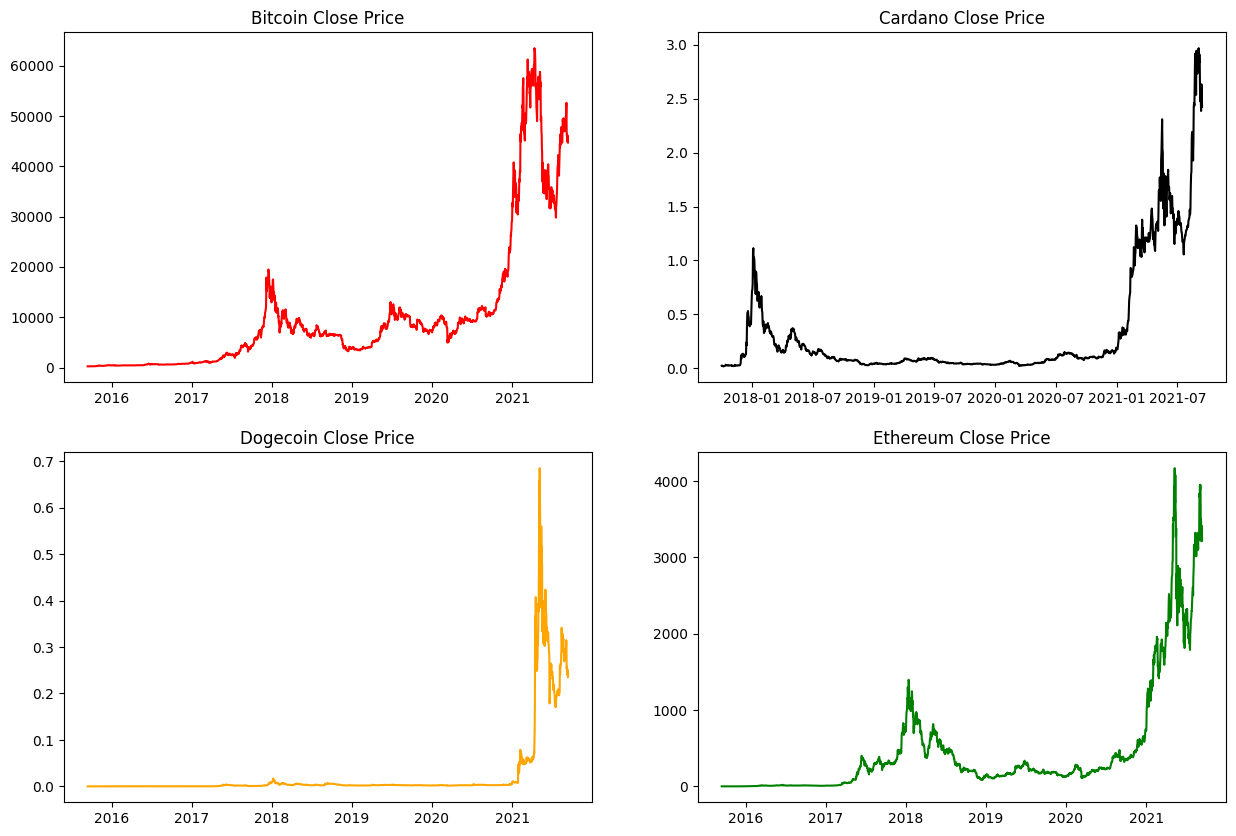

In [11]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'], color="red")
plt.title('Bitcoin Close Price')

plt.subplot(2, 2, 2)
plt.plot(cardanodf['date'], cardanodf['close'], color="black")
plt.title('Cardano Close Price')

plt.subplot(2, 2, 3)
plt.plot(dogecoindf['date'], dogecoindf['close'], color="orange")
plt.title('Dogecoin Close Price')

plt.subplot(2, 2, 4)
plt.plot(ethereumdf['date'], ethereumdf['close'], color="green")
plt.title('Ethereum Close Price')

In [12]:
# Convert date to datetime and set as index
bitcoindf['date'] = pd.to_datetime(bitcoindf['date'])
bitcoindf.set_index('date', inplace=True)

# Now you can resample
monthly_btc = bitcoindf['close'].resample('M').mean()

In [13]:
!pip install plotly
import plotly.graph_objects as go
import pandas as pd

# Reset the index to bring back the 'date' column
bitcoindf = bitcoindf.reset_index()

# Convert date to datetime
bitcoindf['date'] = pd.to_datetime(bitcoindf['date'])

# Set 'date' as index again
bitcoindf.set_index('date', inplace=True)

# Resample to monthly frequency
monthly_btc = bitcoindf['close'].resample('M').mean()

# Create Plotly traces for original data, trend, and seasonality
trace_original = go.Scatter(x=monthly_btc.index, y=monthly_btc.values, mode='lines', name='Original Data')

# Calculate trend using rolling mean
trend = monthly_btc.rolling(window=12).mean()
trace_trend = go.Scatter(x=trend.index, y=trend.values, mode='lines', name='Trend')

# Calculate seasonality by subtracting trend from original data
seasonality = monthly_btc - trend
trace_seasonality = go.Scatter(x=seasonality.index, y=seasonality.values, mode='lines', name='Seasonality')


# Create the Plotly figure
fig = go.Figure(data=[trace_original, trace_trend, trace_seasonality])
fig.update_layout(title='Trend and Seasonality Decomposition - Bitcoin Monthly Closing Price',
                  xaxis_title='Date',
                  yaxis_title='Close Price')

fig.show()

#### Plotting only 2020-2021 year close price of Bitcoin, Cardano, Dogecoin and Ethereum

In [15]:
last1year_bitcoindf = bitcoindf[bitcoindf.index > '09-2020']
last1year_cardanodf = cardanodf[cardanodf['date'] > '09-2020']
last1year_dogecoindf = dogecoindf[dogecoindf['date'] > '09-2020']
last1year_ethereumdf = ethereumdf[ethereumdf['date'] > '09-2020']

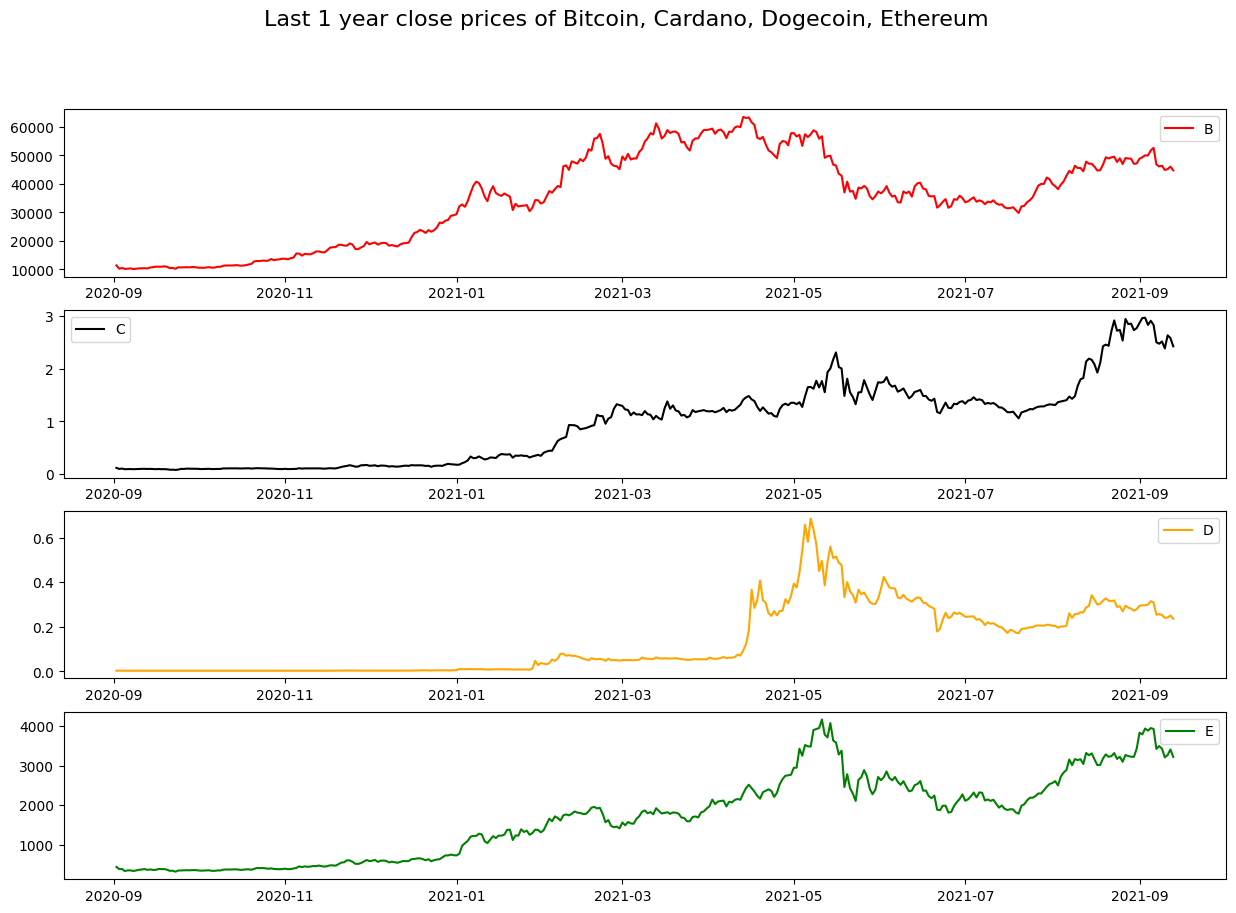

In [17]:
fig = plt.figure(figsize = (15,10))
fig.suptitle("Last 1 year close prices of Bitcoin, Cardano, Dogecoin, Ethereum", fontsize=16)


plt.subplot(4, 1, 1)
# Accessing the index of the dataframe using .index and plotting against the close price.
plt.plot(last1year_bitcoindf.index, last1year_bitcoindf['close'], color="red")
plt.legend("B")

plt.subplot(4, 1, 2)
plt.plot(last1year_cardanodf['date'], last1year_cardanodf['close'], color="black")
plt.legend("C")

plt.subplot(4, 1, 3)
plt.plot(last1year_dogecoindf['date'], last1year_dogecoindf['close'], color="orange")
plt.legend("D")

plt.subplot(4, 1, 4)
plt.plot(last1year_ethereumdf['date'], last1year_ethereumdf['close'], color="green")
plt.legend("E")

#### Plotting only 2020-2021 year volume of Bitcoin, Cardano, Dogecoin and Ethereum

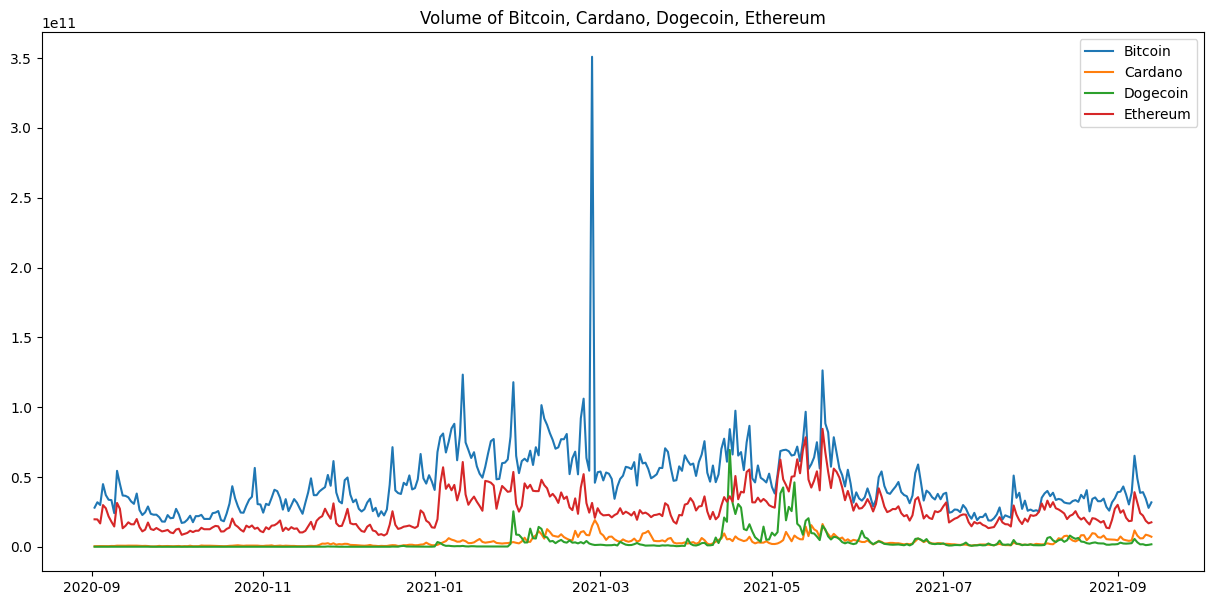

In [19]:
fig = plt.figure(figsize = (15,7))

# Use the index for the x-axis for last1year_bitcoindf
plt.plot(last1year_bitcoindf.index , last1year_bitcoindf['volume'])

# Continue using 'date' column for other DataFrames
plt.plot(last1year_cardanodf['date'] , last1year_cardanodf['volume'])
plt.plot(last1year_dogecoindf['date'], last1year_dogecoindf['volume'])
plt.plot(last1year_ethereumdf['date'], last1year_ethereumdf['volume'])

plt.title('Volume of Bitcoin, Cardano, Dogecoin, Ethereum')
plt.legend(['Bitcoin', 'Cardano', 'Dogecoin', 'Ethereum'])

plt.show()

#### Plotting last month open and close price of Bitcoin, Cardano, Dogecoin and Ethereum with comparision

In [21]:
last1month_bitcoindf = bitcoindf[bitcoindf.index > '08-2021']
last1month_cardanodf = cardanodf[cardanodf['date'] > '08-2021']
last1month_dogecoindf = dogecoindf[dogecoindf['date'] > '08-2021']
last1month_ethereumdf = ethereumdf[ethereumdf['date'] > '08-2021']

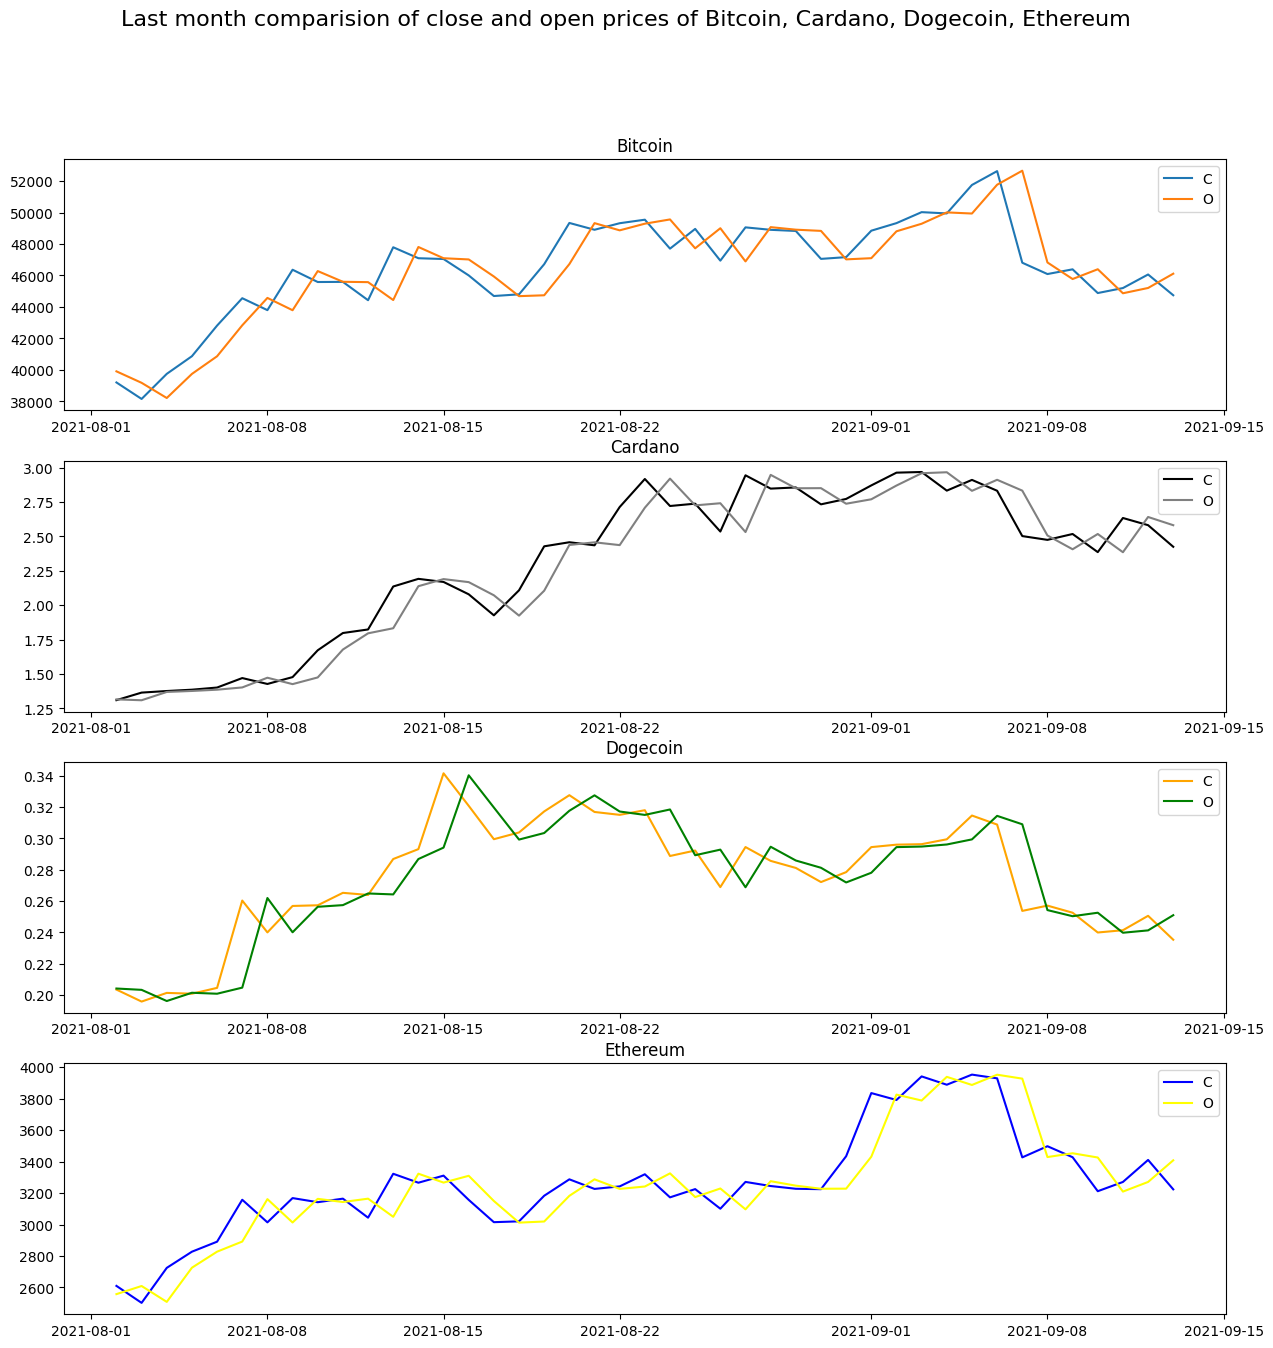

In [23]:
fig = plt.figure(figsize = (15,15))
fig.suptitle("Last month comparision of close and open prices of Bitcoin, Cardano, Dogecoin, Ethereum", fontsize=16)
fig.tight_layout()

plt.subplot(4, 1, 1)
# Accessing the index of the dataframe using .index and plotting against the close price.
plt.plot(last1month_bitcoindf.index, last1month_bitcoindf['close'])
plt.plot(last1month_bitcoindf.index, last1month_bitcoindf['open']) # Accessing the index of the dataframe using .index and plotting against the open price.
plt.legend(["C", "O"])
plt.title("Bitcoin")

plt.subplot(4, 1, 2)
# Continue using 'date' column for other DataFrames
plt.plot(last1month_cardanodf['date'], last1month_cardanodf['close'], color="black")
plt.plot(last1month_cardanodf['date'], last1month_cardanodf['open'], color="grey")
plt.legend(["C", "O"])
plt.title("Cardano")

plt.subplot(4, 1, 3)
plt.plot(last1month_dogecoindf['date'], last1month_dogecoindf['close'], color="orange")
plt.plot(last1month_dogecoindf['date'], last1month_dogecoindf['open'], color="green")
plt.legend(["C", "O"])
plt.title("Dogecoin")

plt.subplot(4, 1, 4)
plt.plot(last1month_ethereumdf['date'], last1month_ethereumdf['close'], color="blue")
plt.plot(last1month_ethereumdf['date'], last1month_ethereumdf['open'], color="yellow")
plt.legend(["C", "O"])
plt.title("Ethereum")


plt.show()

### Moving Averages
**As we know the stock prices are highly volatile and prices change quickly with time. To observe any trend or pattern we can take the help of a 50-day 200-day average.**

Text(0.5, 1.0, 'Ethereum Close Price moving average')

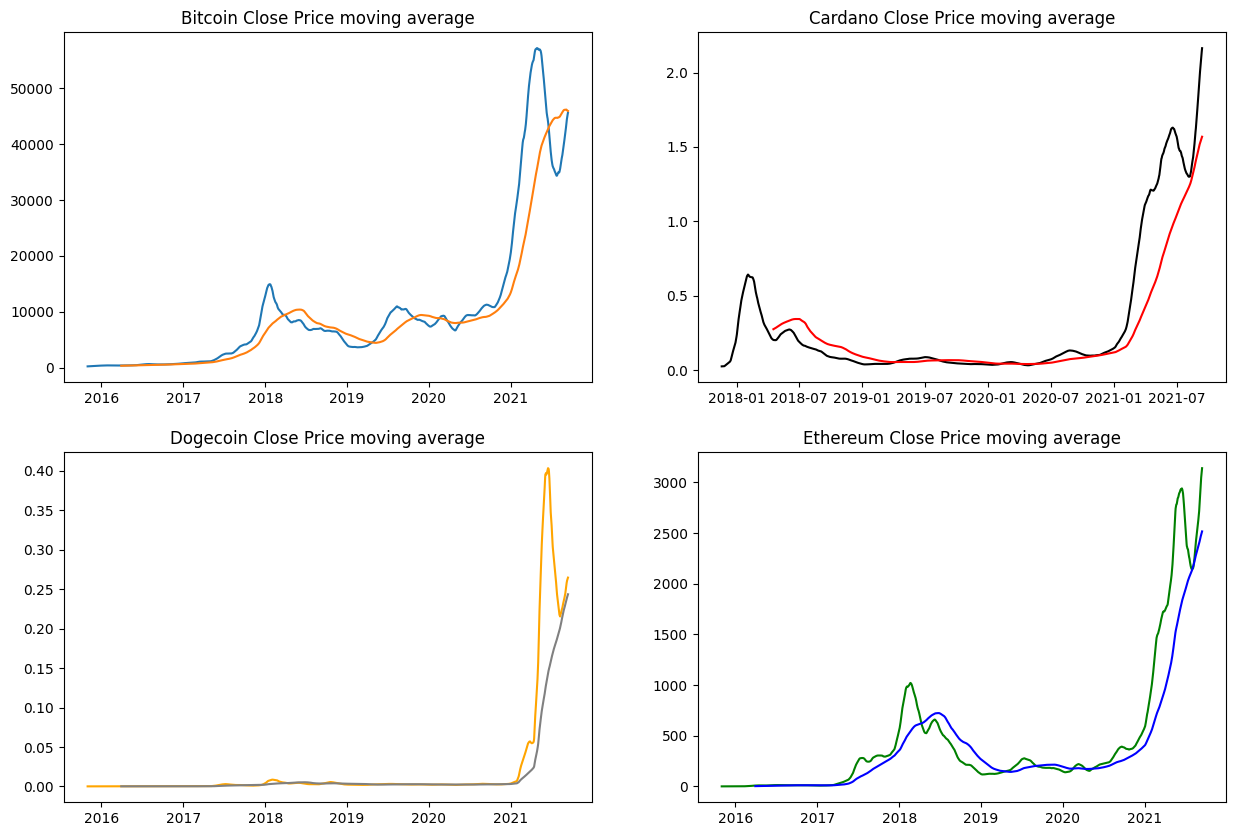

In [25]:
fig = plt.figure(figsize = (15,10))

# For bitcoindf, use the index for the x-axis
plt.subplot(2, 2, 1)
plt.plot(bitcoindf.index, bitcoindf['close'].rolling(50).mean())
plt.plot(bitcoindf.index, bitcoindf['close'].rolling(200).mean())
plt.title('Bitcoin Close Price moving average')

# For the other DataFrames, continue using 'date' column
plt.subplot(2, 2, 2)
plt.plot(cardanodf['date'], cardanodf['close'].rolling(50).mean(), color="black")
plt.plot(cardanodf['date'], cardanodf['close'].rolling(200).mean(), color="red")
plt.title('Cardano Close Price moving average')

plt.subplot(2, 2, 3)
plt.plot(dogecoindf['date'], dogecoindf['close'].rolling(50).mean(), color="orange")
plt.plot(dogecoindf['date'], dogecoindf['close'].rolling(200).mean(), color="grey")
plt.title('Dogecoin Close Price moving average')

plt.subplot(2, 2, 4)
plt.plot(ethereumdf['date'], ethereumdf['close'].rolling(50).mean(), color="green")
plt.plot(ethereumdf['date'], ethereumdf['close'].rolling(200).mean(), color="blue")
plt.title('Ethereum Close Price moving average')

### Plotting histogram with mean indicator of all four cryptocurrencies

Text(3100, 400, 'Ethereum Close Price')

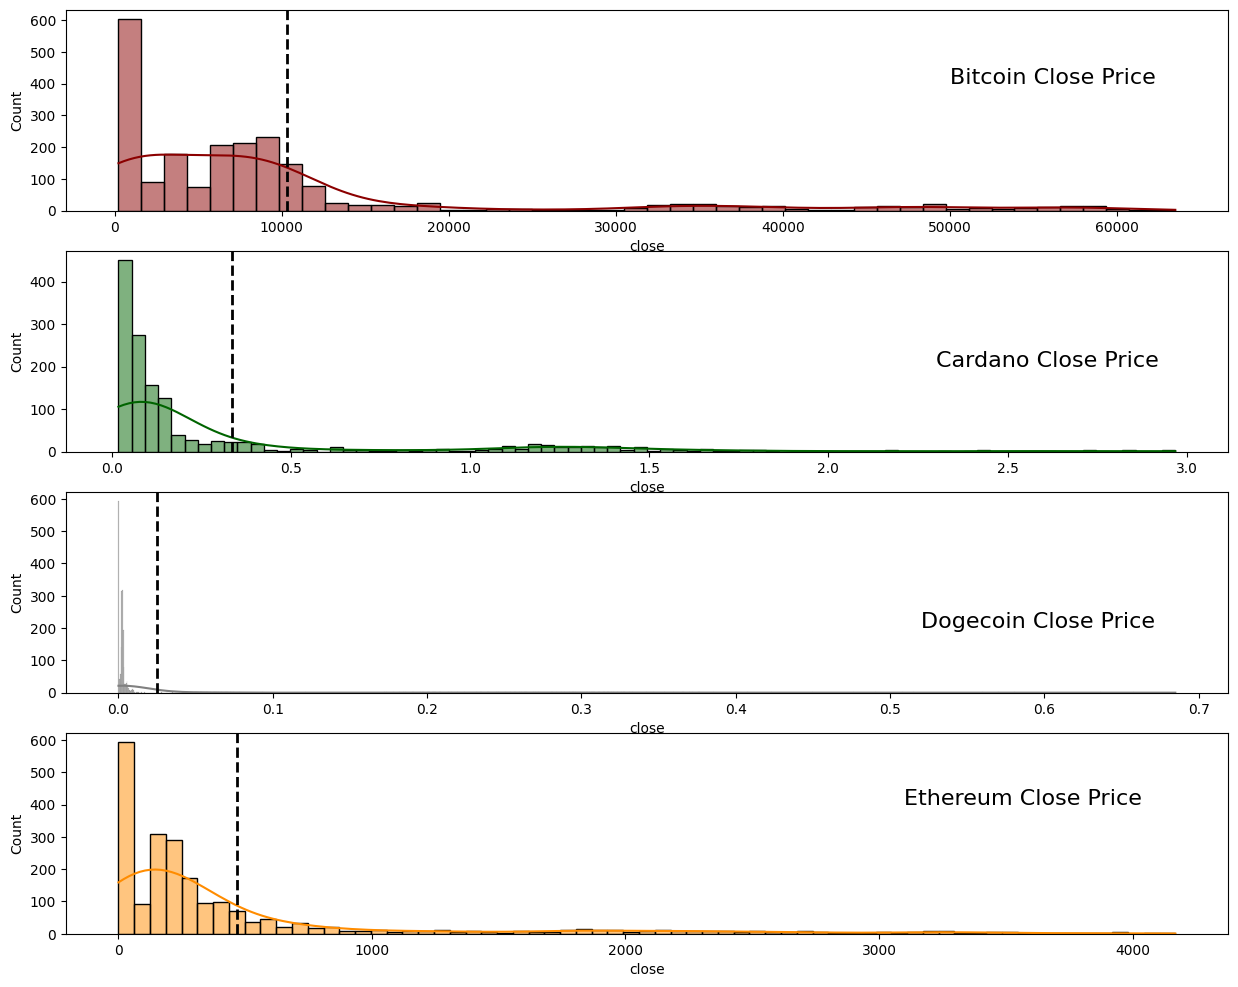

In [26]:
fig = plt.figure(figsize = (15,12))

fig.tight_layout()

plt.subplot(4, 1, 1)
sns.histplot(bitcoindf['close'],color='darkred', kde=True)
plt.axvline(bitcoindf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(50000,400,'Bitcoin Close Price', fontsize=16)

plt.subplot(4, 1, 2)
sns.histplot(cardanodf['close'],color='darkgreen', kde=True)
plt.axvline(cardanodf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(2.3,200,'Cardano Close Price', fontsize=16)

plt.subplot(4, 1, 3)
sns.histplot(dogecoindf['close'],color='grey', kde=True)
plt.axvline(dogecoindf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(0.52,200,'Dogecoin Close Price', fontsize=16)

plt.subplot(4, 1, 4)
sns.histplot(ethereumdf['close'],color='darkorange', kde=True)
plt.axvline(ethereumdf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(3100,400,'Ethereum Close Price', fontsize=16)


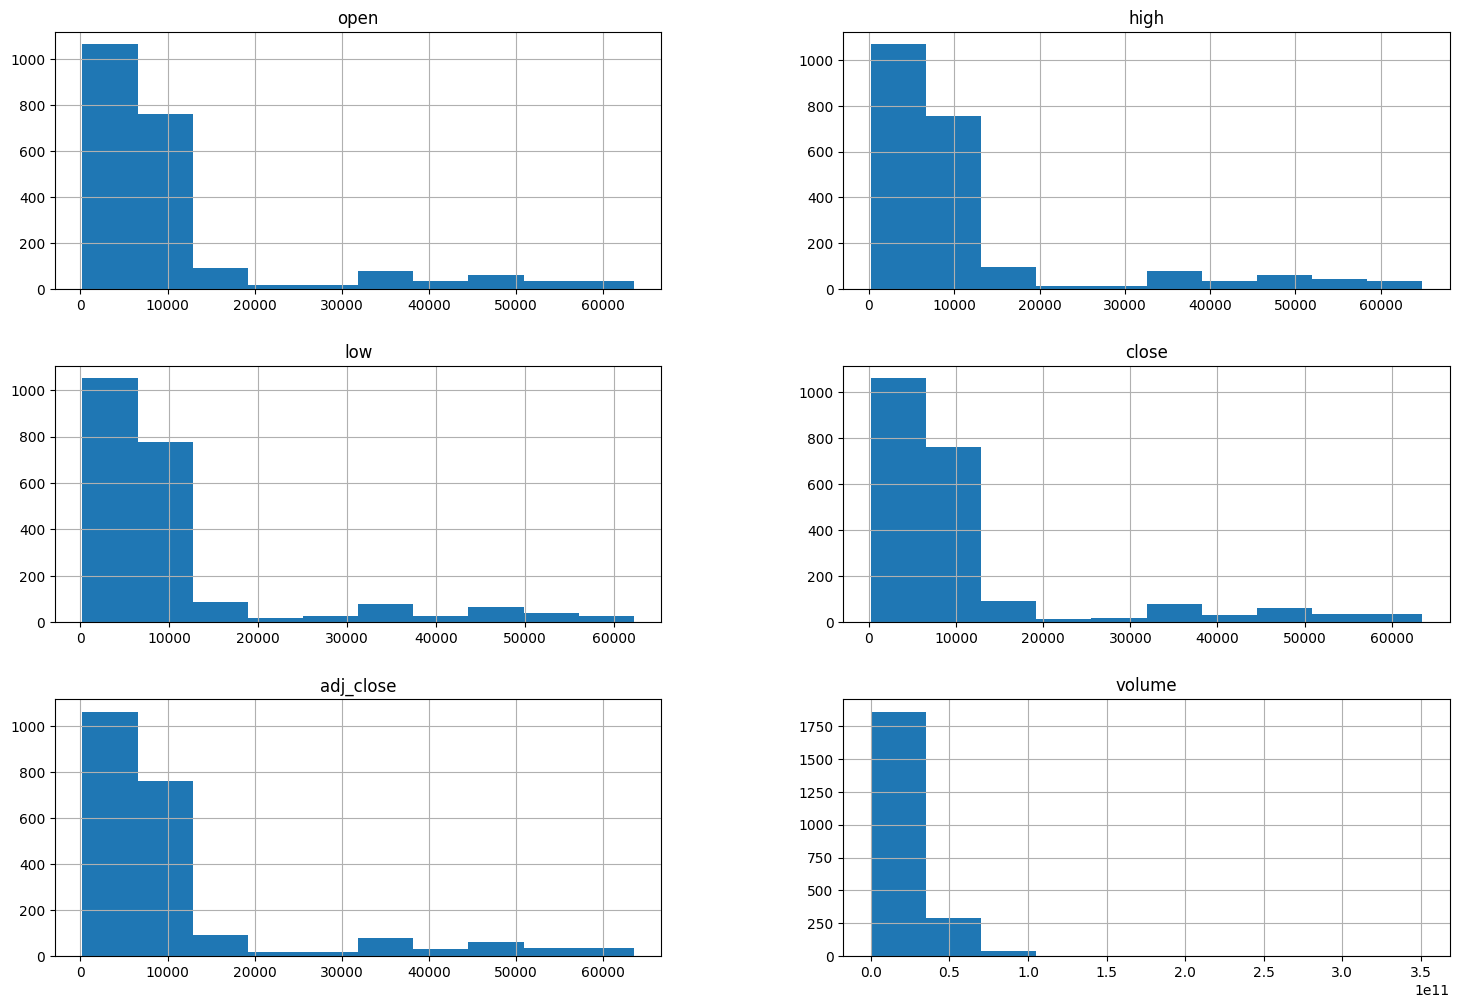

In [27]:
bitcoin_numeric = bitcoindf.select_dtypes(exclude = ["bool"])
bitcoin_numeric.hist(figsize=(18,12))
plt.show()

In [28]:
# ARIMA Model
print("Fitting ARIMA model...")
arima_model = ARIMA(monthly_btc, order=(5, 1, 2))
arima_result = arima_model.fit()
print(arima_result.summary())

Fitting ARIMA model...
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   73
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -671.770
Date:                Sat, 19 Apr 2025   AIC                           1359.540
Time:                        07:47:56   BIC                           1377.753
Sample:                    09-30-2015   HQIC                          1366.791
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.1483      0.195     11.027      0.000       1.766       2.530
ar.L2         -2.3360      0.462     -5.057      0.000      -3.241      -1.431
ar.L3          1.0640      0.

In [30]:
import plotly.graph_objects as go

# Assuming arima_forecast and monthly_btc are already defined

# ... (Your existing code) ...

# Perform ARIMA forecasting and store the results in arima_forecast
arima_forecast = arima_result.forecast(steps=12)  # Assuming arima_result is defined

# Create Plotly traces for historical and forecast data
trace_historical = go.Scatter(
    x=monthly_btc.index,
    y=monthly_btc.values,
    mode='lines',
    name='Historical'
)
trace_forecast = go.Scatter(
    x=arima_forecast.index,  # Now arima_forecast is defined
    y=arima_forecast.values,
    mode='lines',
    name='ARIMA Forecast',
    line=dict(color='red')
)

# Create the Plotly figure
fig = go.Figure(data=[trace_historical, trace_forecast])
fig.update_layout(
    title="ARIMA Forecast - Bitcoin Monthly Closing Price",
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend=dict(x=0, y=1),  # Adjust legend position if needed
    template="plotly_white"  # Optional: Use a white background
)

fig.show()

In [31]:
# SARIMA Model
print("Fitting SARIMA model...")
sarima_model = SARIMAX(monthly_btc, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
print(sarima_result.summary())

Fitting SARIMA model...
                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                   73
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -571.342
Date:                            Sat, 19 Apr 2025   AIC                           1152.684
Time:                                    07:49:20   BIC                           1163.156
Sample:                                09-30-2015   HQIC                          1156.780
                                     - 09-30-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2692      0.205      1.314      0.189      -0.132       0.671
ma.L1      

In [33]:
import plotly.graph_objects as go

# Assuming sarima_forecast and monthly_btc are already defined
# Get forecast and confidence intervals first
sarima_forecast = sarima_result.get_forecast(steps=12)
sarima_conf_int = sarima_forecast.conf_int()

# Create Plotly traces for historical and forecast data
trace_historical = go.Scatter(
    x=monthly_btc.index,
    y=monthly_btc.values,
    mode='lines',
    name='Historical'
)
trace_forecast = go.Scatter(
    x=sarima_forecast.predicted_mean.index,
    y=sarima_forecast.predicted_mean.values,
    mode='lines',
    name='SARIMA Forecast',
    line=dict(color='green')
)
trace_conf_int = go.Scatter(
    x=sarima_conf_int.index,
    y=sarima_conf_int.iloc[:, 0],  # Lower bound
    mode='lines',
    name='Lower Bound',
    line=dict(color='green', width=0),  # Invisible line for fill
    showlegend=False  # Hide from legend
)
trace_conf_int2 = go.Scatter(
    x=sarima_conf_int.index,
    y=sarima_conf_int.iloc[:, 1],  # Upper bound
    mode='lines',
    name='Upper Bound',
    line=dict(color='green', width=0),  # Invisible line for fill
    fill='tonexty',  # Fill area between lower and upper bounds
    fillcolor='rgba(0,128,0,0.2)',  # Green with alpha for transparency
    showlegend=False  # Hide from legend
)

# Create the Plotly figure
fig = go.Figure(data=[trace_historical, trace_forecast, trace_conf_int, trace_conf_int2])
fig.update_layout(
    title="SARIMA Forecast - Bitcoin Monthly Closing Price",
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend=dict(x=0, y=1),  # Adjust legend position if needed
    template="plotly_white"  # Optional: Use a white background
)

fig.show()

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf

In [35]:
!pip install statsmodels
import plotly.graph_objects as go
import statsmodels.api as sm

# Calculate ACF and PACF values
acf_values, acf_conf_int = sm.tsa.acf(monthly_btc, nlags=20, alpha=0.05)
pacf_values, pacf_conf_int = sm.tsa.pacf(monthly_btc, nlags=20, alpha=0.05)

# Create Plotly traces for ACF
trace_acf = go.Scatter(
    x=list(range(len(acf_values))),
    y=acf_values,
    mode='markers+lines',
    name='ACF',
    marker=dict(color='red'),  # Use red for ACF
    line=dict(color='red')
)
trace_acf_upper_conf = go.Scatter(
    x=list(range(len(acf_conf_int[:, 1]))),
    y=acf_conf_int[:, 1],
    mode='lines',
    name='ACF Upper Confidence Interval',
    line=dict(color='gray', dash='dash'),
    showlegend=False
)
trace_acf_lower_conf = go.Scatter(
    x=list(range(len(acf_conf_int[:, 0]))),
    y=acf_conf_int[:, 0],
    mode='lines',
    name='ACF Lower Confidence Interval',
    line=dict(color='gray', dash='dash'),
    fill='tonexty',
    fillcolor='rgba(128, 128, 128, 0.2)',
    showlegend=False
)

# Create Plotly traces for PACF (same as before)
trace_pacf = go.Scatter(
    x=list(range(len(pacf_values))),
    y=pacf_values,
    mode='markers+lines',
    name='PACF',
    marker=dict(color='blue'),  # Use blue for PACF
    line=dict(color='blue')
)
trace_pacf_upper_conf = go.Scatter(
    x=list(range(len(pacf_conf_int[:, 1]))),
    y=pacf_conf_int[:, 1],
    mode='lines',
    name='PACF Upper Confidence Interval',
    line=dict(color='gray', dash='dash'),
    showlegend=False
)
trace_pacf_lower_conf = go.Scatter(
    x=list(range(len(pacf_conf_int[:, 0]))),
    y=pacf_conf_int[:, 0],
    mode='lines',
    name='PACF Lower Confidence Interval',
    line=dict(color='gray', dash='dash'),
    fill='tonexty',
    fillcolor='rgba(128, 128, 128, 0.2)',
    showlegend=False
)

# Create the Plotly figure with subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=('Autocorrelation Function (ACF)', 'Partial Autocorrelation Function (PACF)'))

# Add ACF traces to the first subplot
fig.add_trace(trace_acf, row=1, col=1)
fig.add_trace(trace_acf_upper_conf, row=1, col=1)
fig.add_trace(trace_acf_lower_conf, row=1, col=1)

# Add PACF traces to the second subplot
fig.add_trace(trace_pacf, row=2, col=1)
fig.add_trace(trace_pacf_upper_conf, row=2, col=1)
fig.add_trace(trace_pacf_lower_conf, row=2, col=1)

# Update layout
fig.update_layout(template="plotly_white")
fig.update_xaxes(title_text="Lag")
fig.update_yaxes(title_text="ACF Value", row=1, col=1)
fig.update_yaxes(title_text="PACF Value", row=2, col=1)

fig.show()

#  Bitcoin Close Price Prediction using XGBoost

#### Dataframe of bitcoin close price

In [37]:
# Reset the index to bring back 'date' as a column
bitcoindf = bitcoindf.reset_index()

# Now you can access 'date' as a column
closedf = bitcoindf[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2193, 2)


In [38]:
closedf = closedf[closedf['date'] > '2020-09-13']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  365


#### Normalizing close price value

In [39]:
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(365, 1)


#### Separate data for Train and Test

In [40]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (255, 1)
test_data:  (110, 1)


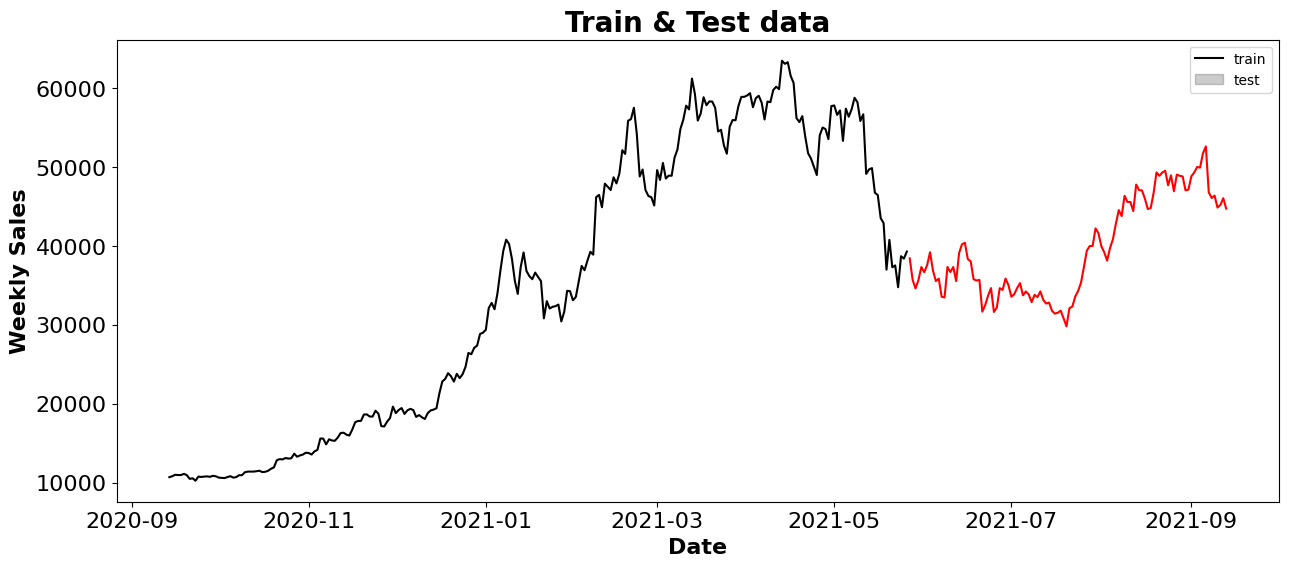

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_stock['date'][:255], y = close_stock['close'][:255], color = 'black')
sns.lineplot(x = close_stock['date'][255:], y = close_stock['close'][255:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

#### Prepare train data for time series analysis

In [42]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [43]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (239, 15)
y_train:  (239,)
X_test:  (94, 15)
y_test (94,)


#### Import XGBRegressor module and Fit X_train and y_train for training model

In [44]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Model testing and evaluation

In [45]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.03075410308003782
Root Mean squared Error - RMSE : 0.03971437751524892


In [46]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (239, 1)
Test data prediction: (94, 1)


In [47]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [48]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


#### Prediction next 10 days

In [49]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = my_model.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [50]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [51]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [52]:
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist())
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

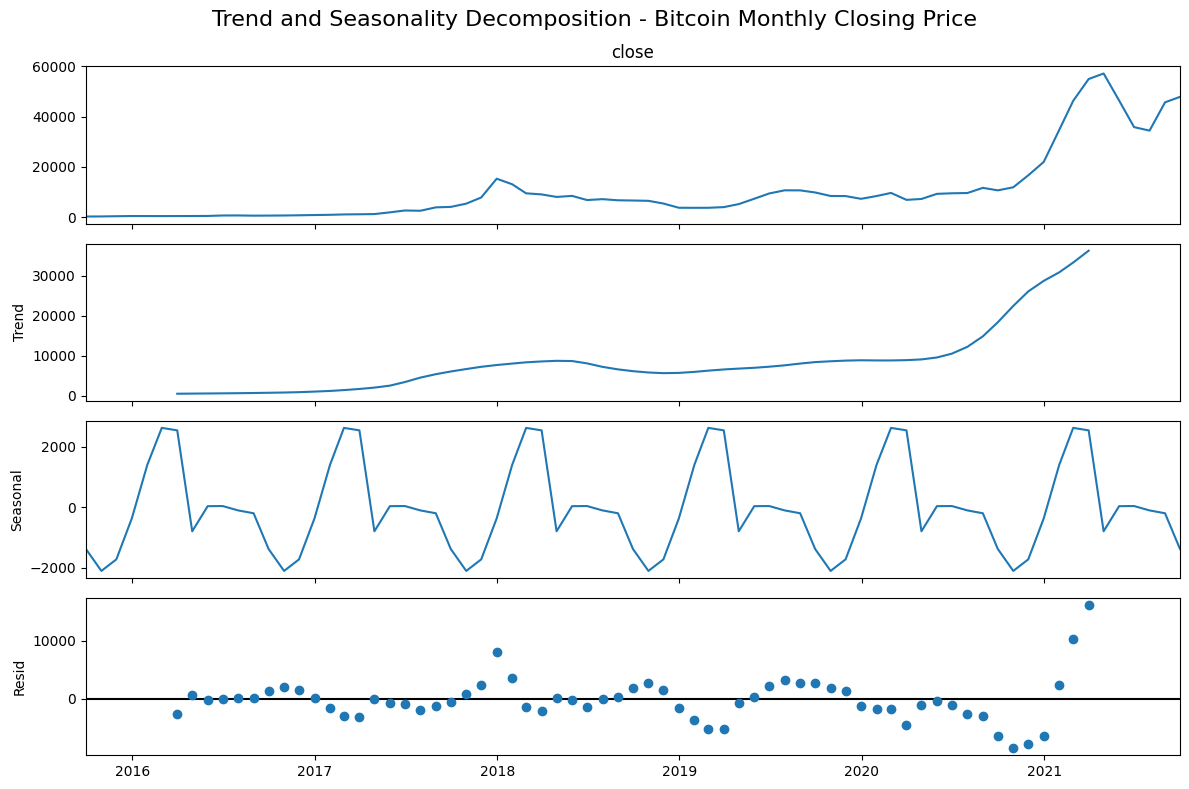

Fitting ARIMA model...
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   73
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -671.770
Date:                Sat, 19 Apr 2025   AIC                           1359.540
Time:                        07:52:50   BIC                           1377.753
Sample:                    09-30-2015   HQIC                          1366.791
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.1483      0.195     11.027      0.000       1.766       2.530
ar.L2         -2.3360      0.462     -5.057      0.000      -3.241      -1.431
ar.L3          1.0640      0.

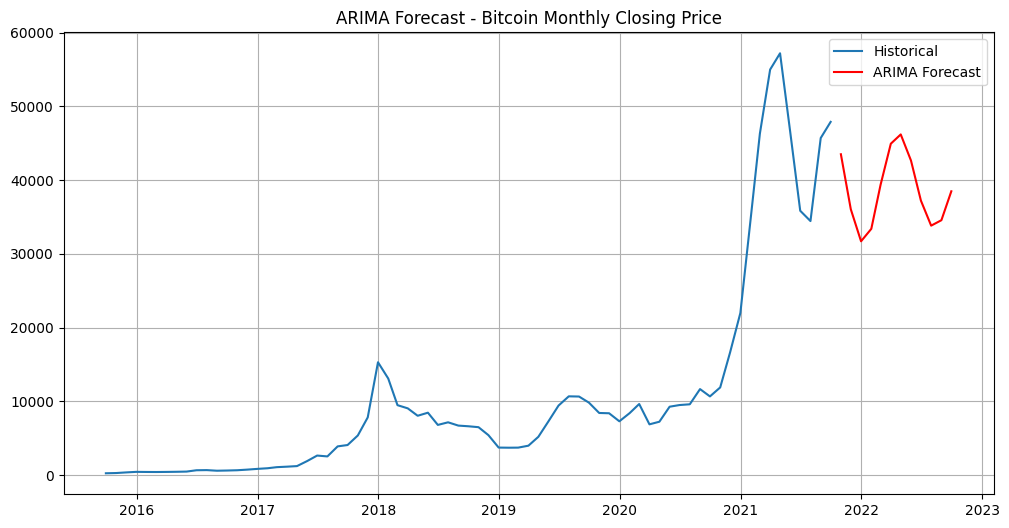

Fitting SARIMA model...
                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                   73
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -571.342
Date:                            Sat, 19 Apr 2025   AIC                           1152.684
Time:                                    07:52:51   BIC                           1163.156
Sample:                                09-30-2015   HQIC                          1156.780
                                     - 09-30-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2692      0.205      1.314      0.189      -0.132       0.671
ma.L1      

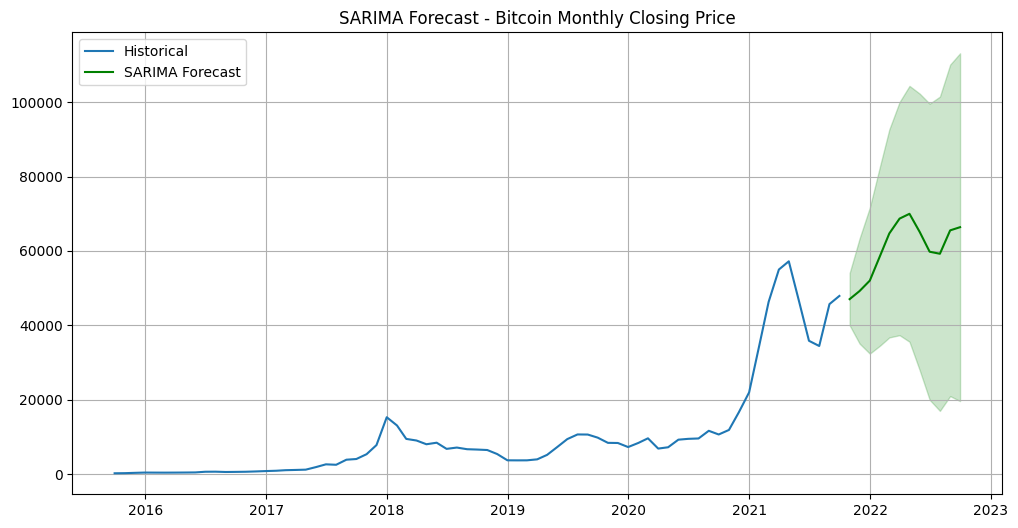

In [53]:

# ============================ ARIMA and SARIMA Modeling ============================

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

# Convert date to datetime and set as index
bitcoindf['date'] = pd.to_datetime(bitcoindf['date'])
bitcoindf.set_index('date', inplace=True)

# Resample daily to monthly average to emphasize trend and seasonality
monthly_btc = bitcoindf['close'].resample('M').mean()

# Plot decomposition
decomposition = seasonal_decompose(monthly_btc, model='additive')
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("Trend and Seasonality Decomposition - Bitcoin Monthly Closing Price", fontsize=16)
plt.tight_layout()
plt.show()

# ARIMA Model
print("Fitting ARIMA model...")
arima_model = ARIMA(monthly_btc, order=(5, 1, 2))
arima_result = arima_model.fit()
print(arima_result.summary())

# Forecasting using ARIMA
arima_forecast = arima_result.forecast(steps=12)
plt.figure(figsize=(12, 6))
plt.plot(monthly_btc, label='Historical')
plt.plot(arima_forecast, label='ARIMA Forecast', color='red')
plt.title("ARIMA Forecast - Bitcoin Monthly Closing Price")
plt.legend()
plt.grid(True)
plt.show()

# SARIMA Model
print("Fitting SARIMA model...")
sarima_model = SARIMAX(monthly_btc, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
print(sarima_result.summary())

# Forecasting using SARIMA
sarima_forecast = sarima_result.get_forecast(steps=12)
sarima_conf_int = sarima_forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(monthly_btc, label='Historical')
plt.plot(sarima_forecast.predicted_mean, label='SARIMA Forecast', color='green')
plt.fill_between(sarima_forecast.predicted_mean.index,
                 sarima_conf_int.iloc[:, 0],
                 sarima_conf_int.iloc[:, 1], color='green', alpha=0.2)
plt.title("SARIMA Forecast - Bitcoin Monthly Closing Price")
plt.legend()
plt.grid(True)
plt.show()
